# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows=None

# import 'Seaborn'
import seaborn as sns

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import variance_inflation_factor from statsmodel to perform multicollinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import train-test split 
from sklearn.model_selection import train_test_split

# 2. Data Preparation

## 2.1 Understand the Data

#### Read the dataset and print the first five observations.

#### Dataset 'Loan_Data' that is used here, obtained after dropping columns which have null values greater than 50% (part of preliminary analysis)

In [2]:
# load the excel file
# store the data in 'loan_df'
loan_df = pd.read_excel('Loan_Data.xlsx', index_col=0)

# display first five observations using head()
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0


**we will make a copy of this dataframe, so that original dataframe 'loan_df' is not altered**

In [3]:
loan_df1=loan_df.copy()

**Let us now see the number of variables and observations in the data.**

In [4]:
# use 'shape' to check the dimension of data
loan_df1.shape

(855969, 52)

**Interpretation:** The data has 855969 observations and 52 variables.

**Get a concise summary of the DataFrame.**

In [5]:
# use 'info()' to understand the dataset
loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 0 to 855968
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          855969 non-null  int64         
 1   member_id                   855969 non-null  int64         
 2   loan_amnt                   855969 non-null  int64         
 3   funded_amnt                 855969 non-null  int64         
 4   funded_amnt_inv             855969 non-null  float64       
 5   term                        855969 non-null  object        
 6   int_rate                    855969 non-null  float64       
 7   installment                 855969 non-null  float64       
 8   grade                       855969 non-null  object        
 9   sub_grade                   855969 non-null  object        
 10  emp_title                   806525 non-null  object        
 11  emp_length                  812908 non-

**Interpretation:** by looking at the datatypes of columns, we can say that all the variables have correct data type.

## 2.2 Remove Insignificant Variables

columns such as `id`,`member_id` contains the id of the loan and borrower respectively, which is redundant for further analysis. Thus, we drop these columns from loan_df1 dataframe.

In [6]:
# drop the column 'id','member_id' using drop()
# 'axis = 1' drops the specified column
loan_df1 = loan_df1.drop(['id','member_id'],axis=1)

**checking unique values present in the columns of the dataset**

In [7]:
# unique values in the columns

# stores unique values
u=[]


# loop for calculating unique values present in variables
for i in loan_df1.columns:
    u.append((loan_df1[i].nunique(dropna=True)))

# dataframe for storing unique values against each variable in the 'loan_df1' dataframe   
d=pd.DataFrame(u,index=loan_df1.columns,columns=['Unique values'])

# code for highlighting unique values which are less than 2
def highlight(s, props=''):
    return props if s<2 else None

d.style.applymap(highlight, props='color:white;background-color:darkblue')

,Unique values
loan_amnt,1368
funded_amnt,1368
funded_amnt_inv,8818
term,2
int_rate,520
installment,67349
grade,7
sub_grade,35
emp_title,290909
emp_length,11


**Interpretation:** As we can see from above 'policy_code' has only one unique value, so we will remove it from 'loan_df1' dataframe.

In [8]:
# drop the column 'policy_code' using drop()
# 'axis = 1' drops the specified column
loan_df1 = loan_df1.drop(['policy_code'],axis=1)

**checking value counts present in the categorical columns of the dataset**

In [9]:
#checking frequency distribution between categories 
#present in the categorical variables of the dataset.

loan_df1.describe(include=[np.object])

<ipython-input-9-4844d88c9329>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  loan_df1.describe(include=[np.object])


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,zip_code,addr_state,initial_list_status,application_type
count,855969,855969,855969,806525,812908,855969,855969,855969,855969,855935,855969,855969,855969,855969
unique,2,7,35,290909,11,6,3,2,14,60946,931,51,2,2
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL
freq,600221,247998,54958,12965,282090,429106,318178,855964,505392,398089,9466,125172,442555,855527


**Interpretation:** frequency distribution of `pymnt_plan`,`application_type` is mostly concentrated around one category, so therefore we remove these columns from loan_df1 dataframe.

In [10]:
# drop the column 'pymnt_plan','application_type' using drop()
# 'axis = 1' drops the specified column
loan_df1 = loan_df1.drop(['pymnt_plan','application_type'],axis=1)

**Removing columns based on Domain Understanding.**

We remove categorical columns named `emp_title`,`emp_length`,`purpose`,`title`,`zip_code`,`addr_state` and date columns such as `issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, `last_credit_pull_d` from loan_df1 dataframe, as they are not going to help in our model building.

In [11]:
# drop the columns 'emp_title','emp_length','purpose','title','zip_code','addr_state',
#'issue_d', 'earliest_cr_line', 'last_pymnt_d','next_pymnt_d','last_credit_pull_d' using drop()
# 'axis = 1' drops the specified column

loan_df1 = loan_df1.drop(['emp_title','emp_length','purpose','title','zip_code','addr_state', 'earliest_cr_line', 'last_pymnt_d','next_pymnt_d','last_credit_pull_d'],axis=1)

**Now let us check variance present in numerical variables of loan_df1 dataframe.**

In [12]:
# extracting numerical features from 'loan_df' dataframe
n=loan_df1.select_dtypes(include=[np.number])

n.var()

loan_amnt                     7.098635e+07
funded_amnt                   7.088750e+07
funded_amnt_inv               7.099420e+07
int_rate                      1.908261e+01
installment                   5.940279e+04
annual_inc                    4.129922e+09
dti                           3.035829e+02
delinq_2yrs                   7.347737e-01
inq_last_6mths                9.293598e-01
open_acc                      2.817586e+01
pub_rec                       3.382416e-01
revol_bal                     4.938947e+08
revol_util                    5.669916e+02
total_acc                     1.396850e+02
out_prncp                     7.160454e+07
out_prncp_inv                 7.154616e+07
total_pymnt                   6.255835e+07
total_pymnt_inv               6.217569e+07
total_rec_prncp               4.457446e+07
total_rec_int                 4.333446e+06
total_rec_late_fee            1.302776e+01
recoveries                    1.706814e+05
collection_recovery_fee       3.903572e+03
last_pymnt_

**Interpretation:** As we can see from above, all the columns have considerable amount of variance so we are not dropping any of the numerical columns based on the variance.

**Now let us remove numerical columns based on high coorelation.**

Display correlated values only which are greater than 0.8 or less than -0.8

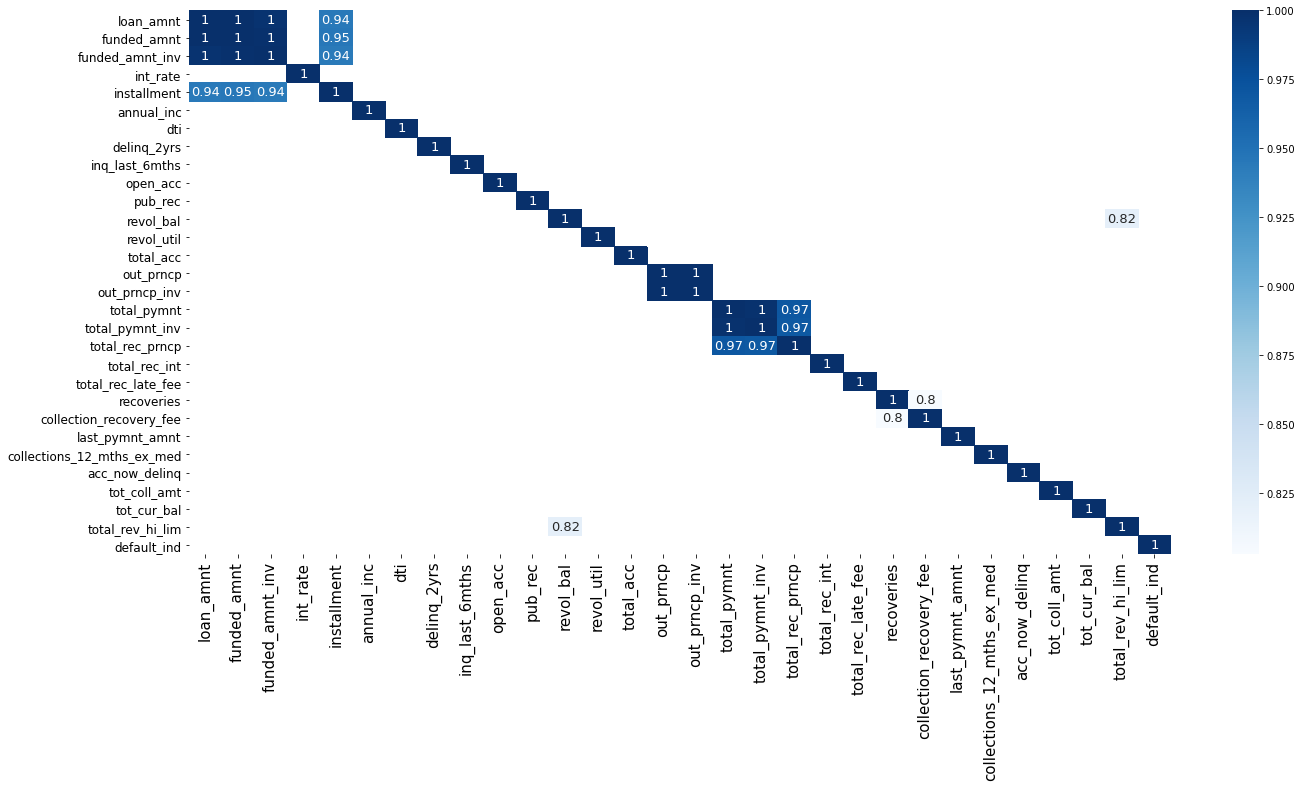

In [13]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (22,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(loan_df1.corr()[np.abs(loan_df1.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = 'Blues')

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

**Interpretation:** Let us remove columns which are having coorelation greater than 0.9.

Columns such as `loan_amnt`,`funded_amnt_inv`,`installment` are having high coorelation with `funded_amnt`,so we drop these columns and retain only `funded_amnt` column.

Similarly columns such as `total_pymnt`,`total_pymnt_inv` are highly correlated with `total_rec_prncp`,o we drop these columns and retain only `total_rec_prncp` column.

And `out_prncp_inv` is highly correlated with `out_prncp`, therefore we drop this column and retain only `out_prncp` column.

In [14]:
# drop the columns 'loan_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','out_prncp_inv' using drop()
# 'axis = 1' drops the specified columns

loan_df1 = loan_df1.drop(['loan_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','out_prncp_inv'],axis=1)

#### Checking columns and number of columns after removing all insignificant variables based on different conditions that are discussed above.

In [15]:
print('Columns left after removing insignificant variables are :\n\n',list(loan_df1.columns),end='\n\n')


print('Number of columns left after removing insignificant variables are :',len(loan_df1.columns))

Columns left after removing insignificant variables are :

 ['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']

Number of columns left after removing insignificant variables are : 31


## 2.3 Outlier Analysis and Treatment

**Check the outliers in all the variables and treat them using appropriate techniques.**

We need to check distribution of important columns based on domain understanding, and then remove outliers from each of these columns sequentially without affecting percentage of count of categories present in `default_ind` column.

columns which we are considering are `funded_amnt`,`annual_inc`,`revol_util`,`dti`, `int_rate`,`total_rec_prncp`,`total_rec_int`,`open_acc`, `total_acc`
      

#### Distributions before removing outliers.

C:\Users\cvina\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


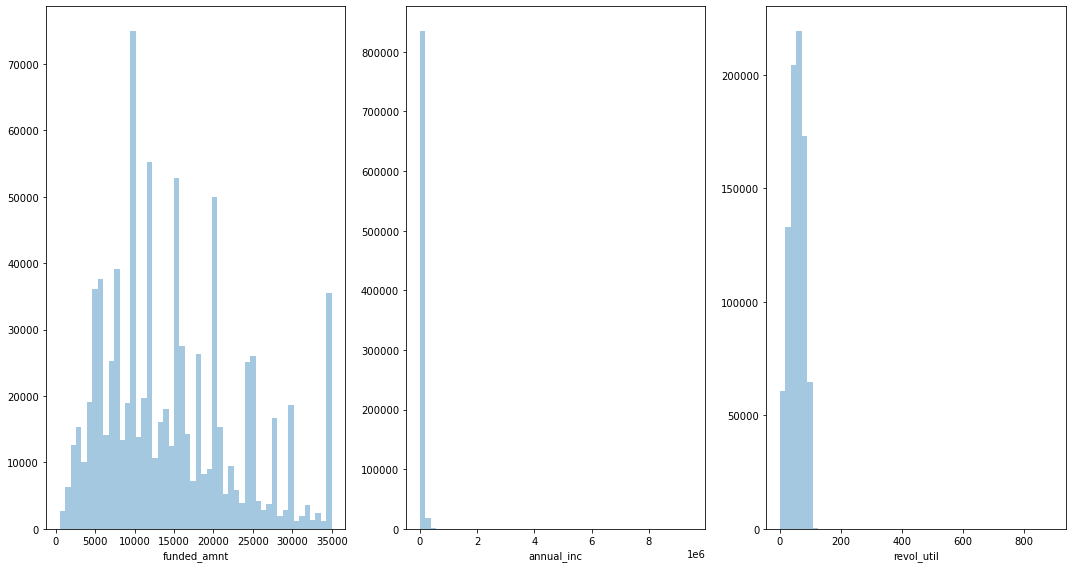

In [16]:
# distribution of first three columns

plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.distplot(a=loan_df1['funded_amnt'],kde=False)
    
plt.subplot(1,3,2)
sns.distplot(a=loan_df1['annual_inc'],kde=False)
        
plt.subplot(1,3,3)
sns.distplot(a=loan_df1['revol_util'],kde=False)

plt.tight_layout()

plt.show()


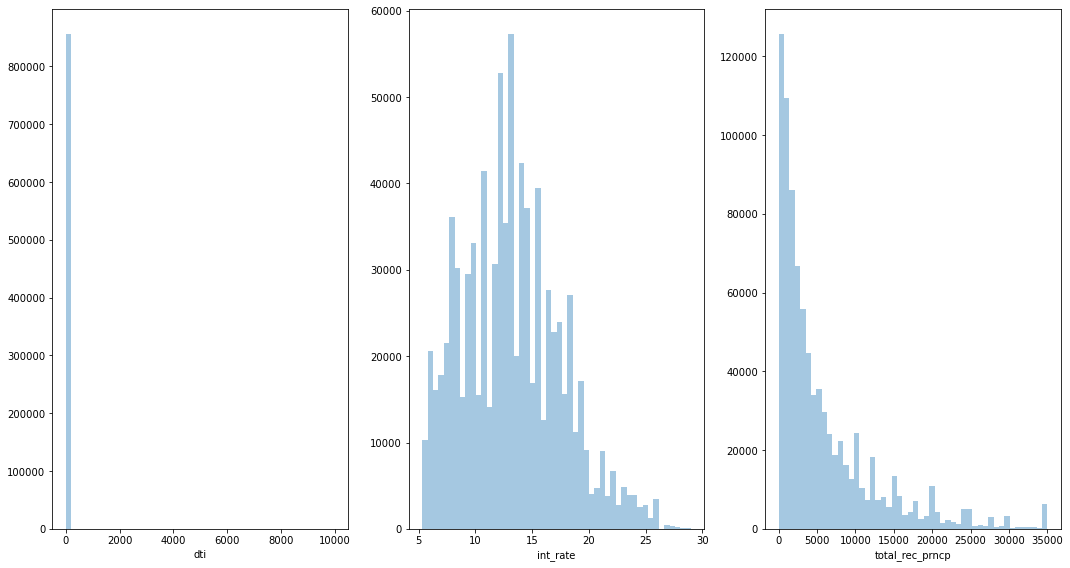

In [17]:
# distribution of next three columns

plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.distplot(a=loan_df1['dti'],kde=False)
    
plt.subplot(1,3,2)
sns.distplot(a=loan_df1['int_rate'],kde=False)
        
plt.subplot(1,3,3)
sns.distplot(a=loan_df1['total_rec_prncp'],kde=False)

plt.tight_layout()

plt.show()

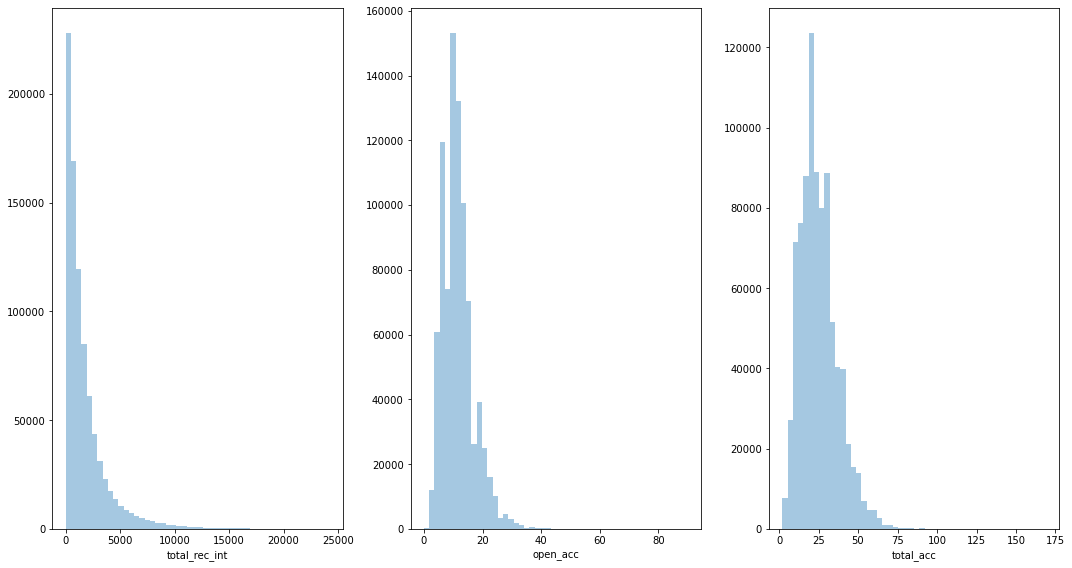

In [18]:
# distribution of last three columns

plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.distplot(a=loan_df1['total_rec_int'],kde=False)
    
plt.subplot(1,3,2)
sns.distplot(a=loan_df1['open_acc'],kde=False)
        
plt.subplot(1,3,3)
sns.distplot(a=loan_df1['total_acc'],kde=False)

plt.tight_layout()

plt.show()

Based on the distribution of columns and understanding of range of values columns should have, based on this we remove outliers sequentially

In [19]:
# 'funded_amnt' does not contain outliers

loan_df1=loan_df1[loan_df1['annual_inc']<160000]

loan_df1=loan_df1[loan_df1['revol_util']<108]

loan_df1=loan_df1[loan_df1['dti']<316]

loan_df1=loan_df1[loan_df1['int_rate']<26.3]

loan_df1=loan_df1[loan_df1['total_rec_int']<13000]

In [20]:
# shape of the dataframe after we remove outliers

loan_df1.shape

(813586, 31)

In [21]:
# value counts of categories present in 'default_ind' column after removing outliers

loan_df1['default_ind'].value_counts(normalize=True)

0    0.944666
1    0.055334
Name: default_ind, dtype: float64

In [22]:
# value counts of categories present in 'default_ind' before removing outliers

loan_df['default_ind'].value_counts(normalize=True)

0    0.945714
1    0.054286
Name: default_ind, dtype: float64

**Interpretation:** Instead of adopting ad-hoc method to remove outliers from the dataframe, we used understanding of domain to remove outliers, at the same time as we can see from above, percentage of count of categories present in target column i.e `default_ind` did not change.

This strategy of treating outliers will be getting updated once we start building model.

## 2.4 Missing Value Analysis and Treatment

**Check the presence of missing values in the data and treat them.**

In [23]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = loan_df1.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (loan_df1.isnull().sum()*100/len(loan_df1)).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
total_rev_hi_lim,64258,7.89812
tot_cur_bal,64258,7.89812
tot_coll_amt,64258,7.89812
collections_12_mths_ex_med,48,0.00590
funded_amnt,0,0.00000
total_acc,0,0.00000
acc_now_delinq,0,0.00000
last_pymnt_amnt,0,0.00000
collection_recovery_fee,0,0.00000
recoveries,0,0.00000


**Interpretation:** As we can see from above only top 4 columns have null values those are `collections_12_mths_ex_med`, `tot_coll_amt`,`tot_cur_bal`, `total_rev_hi_lim`.

In [24]:
# Drop rows for the variables having less than 5% missing values
loan_df1.dropna(axis=0, subset= ['collections_12_mths_ex_med'], inplace=True)

In [25]:
# check for skewness of the columns with missing values

print('Skewness of   total_rev_hi_lim    :',loan_df1.total_rev_hi_lim.skew())
print('Skewness of   tot_cur_bal         :',loan_df1.tot_cur_bal.skew())
print('Skewness of   tot_coll_amt        :',loan_df1.tot_coll_amt.skew())

Skewness of   total_rev_hi_lim    : 4.05500743653349
Skewness of   tot_cur_bal         : 1.5845531703100229
Skewness of   tot_coll_amt        : 823.9938721407439


In [26]:
# Imputing Median values

loan_df1.total_rev_hi_lim = loan_df1.total_rev_hi_lim.fillna(loan_df1.total_rev_hi_lim.median())
loan_df1.tot_cur_bal = loan_df1.tot_cur_bal.fillna(loan_df1.tot_cur_bal.median())
loan_df1.tot_coll_amt = loan_df1.tot_coll_amt.fillna(loan_df1.tot_coll_amt.median())

In [27]:
# total number of null values in the dataframe

loan_df1.isnull().sum().sum()

0

**Interpretation:** As we can see from above, null values in the columns are dealt.

## 2.5 Checking for duplicates

In [28]:
loan_df1.duplicated().sum()

0

**Interpretation:** As we can see from above,there are no duplicates in dataframe.

## 2.6 Encoding of Categorical Variables

In [29]:
# CATEGORICAL COLUMNS:
df_cat = loan_df1.select_dtypes(include= 'object')

In [30]:
df_cat.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'initial_list_status'],
      dtype='object')

In [31]:
# Dummyencoding
cat_encoded=pd.get_dummies(data=loan_df1[['term','home_ownership','verification_status','initial_list_status']],drop_first= True)

In [32]:
cat_encoded['grade']=loan_df1.grade.map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})

cat_encoded['sub_grade']=loan_df1.sub_grade.map({'A1':0,'B1':5,'C1':10,'D1':15,'E1':20,'F1':25,'G1':30,
                                                'A2':1,'B2':6,'C2':11,'D2':16,'E2':21,'F2':26,'G2':31,
                                                'A3':2,'B3':7,'C3':12,'D3':17,'E3':22,'F3':27,'G3':32,
                                                'A4':3,'B4':8,'C4':13,'D4':18,'E4':23,'F4':28,'G4':33,
                                                'A5':4,'B5':9,'C5':14,'D5':19,'E5':24,'F5':29,'G5':34})

In [33]:
# NUMERICAL COLUMN:

df_num  = loan_df1.select_dtypes(include= np.number).drop('default_ind',axis=1)  # -----> without target variable             
df_num1 = loan_df1.select_dtypes(include= np.number)              # -----> with target variable              

In [34]:
# CONCATINATING NUMERICAL AND ENCODED CATEGORICAL:

df_vif=pd.concat([df_num,cat_encoded],axis=1)        # ------> for vif calculation  (doesnt have target variable)
df_final=pd.concat([df_num1,cat_encoded],axis=1)     # ------> for train test split (has target variable)

## 2.7. MULTICOLLINEARITY

#### Calculate the VIF for each numeric variable.

In [35]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# create a column of variable names
vif["Features"] = df_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,53.649706,funded_amnt
1,23.915298,out_prncp
2,18.391109,total_rec_prncp
3,13.159478,int_rate
4,12.761135,open_acc
5,11.703504,total_acc
6,9.971818,annual_inc
7,9.830986,revol_util
8,8.740905,total_rev_hi_lim
9,7.859797,dti


The output shows that the variable 'funded_amnt' has the highest VIF. Now, we use the `for loop` to find VIF and remove the variables with VIF greater than 10. We set the threshold to 10, as we wish to remove the variable for which the remaining variables explain more than 90% of the variation. One can choose the threshold  other than 10. (it depends on the business requirements)

In [36]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_num.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

    # create a column of variable names
    vif["Features"] = df_num.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_num = df_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                    Features
0     9.579808                  annual_inc
1     6.624970                         dti
2     1.190832                 delinq_2yrs
3     1.568690              inq_last_6mths
4     1.141866                     pub_rec
5     6.311702                   revol_bal
6     7.332531                  revol_util
7     7.402263                   total_acc
8     3.779093                   out_prncp
9     8.020594             total_rec_prncp
10    3.517190               total_rec_int
11    1.024971          total_rec_late_fee
12    2.911107                  recoveries
13    2.790364     collection_recovery_fee
14    3.253917             last_pymnt_amnt
15    1.018762  collections_12_mths_ex_med
16    1.023762              acc_now_delinq
17    1.000704                tot_coll_amt
18    2.814154                 tot_cur_bal
19    8.046988            total_rev_hi_lim


**Interpretation** Now, we have all the variables with VIF less than 10. So, we can conclude that there is no multicollinearity in the data.

In [37]:
# display the first 5 observations

df_num.head()

,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,24000.0,27.65,0,1,0,13648,83.7,9,0.0,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0,0.0,74824.0,23100.0
1,30000.0,1.00,0,5,0,1687,9.4,4,0.0,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0,0.0,74824.0,23100.0
2,12252.0,8.72,0,2,0,2956,98.5,10,0.0,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0,0.0,74824.0,23100.0
3,49200.0,20.00,0,1,0,5598,21.0,37,0.0,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0,0.0,74824.0,23100.0
4,80000.0,17.94,0,0,0,27783,53.9,38,766.9,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0,0.0,74824.0,23100.0


## 2.8. Transformations

In [38]:
df_num.skew()

annual_inc                      0.739094
dti                             0.226613
delinq_2yrs                     5.552401
inq_last_6mths                  1.686650
pub_rec                        14.089351
revol_bal                       6.395372
revol_util                     -0.170218
total_acc                       0.896028
out_prncp                       0.969440
total_rec_prncp                 1.914632
total_rec_int                   2.307645
total_rec_late_fee             19.545769
recoveries                     17.909853
collection_recovery_fee        29.306333
last_pymnt_amnt                 3.413825
collections_12_mths_ex_med     17.973022
acc_now_delinq                 25.247391
tot_coll_amt                  858.532510
tot_cur_bal                     1.713170
total_rev_hi_lim                4.253788
dtype: float64

In [57]:
# sqrt transformation

df_transformed=np.sqrt(df_num)

In [58]:
df_transformed.skew()

annual_inc                     0.240352
dti                           -0.432488
delinq_2yrs                    2.167605
inq_last_6mths                 0.617907
pub_rec                        2.310765
revol_bal                      1.353269
revol_util                    -0.930377
total_acc                      0.198819
out_prncp                      0.002234
total_rec_prncp                0.802838
total_rec_int                  0.904559
total_rec_late_fee            10.527066
recoveries                     7.891976
collection_recovery_fee       11.281937
last_pymnt_amnt                2.251959
collections_12_mths_ex_med     8.941738
acc_now_delinq                15.440037
tot_coll_amt                  19.129932
tot_cur_bal                    0.675441
total_rev_hi_lim               1.318690
dtype: float64

**Interpretation** As we can see skewness of all numerical variables have been reduced after square root transformation.

Here we implemented simple transformation strategy, but in future, while model building we would tranform each variable with different strategy or same based on the validity of assumptions, that are required before building parametric classification models.

## 2.9 Scaling

In [59]:
# scale the independent numeric and target variable
df_transformed = df_transformed.apply(lambda rec: (rec - rec.mean()) / rec.std())

df_transformed.head()

,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-1.730188,1.063787,-0.454488,0.754240,-0.414259,0.052537,1.077216,-1.604718,-1.280168,0.155715,-0.319107,-0.103898,-0.150269,-0.119997,-0.620970,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737
1,-1.409314,-3.048500,-0.454488,2.712322,-0.414259,-1.422955,-2.241841,-2.466993,-1.280168,-1.125812,-0.744472,-0.103898,1.449950,0.360199,-0.687535,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737
2,-2.506337,-1.162512,-0.454488,1.410405,-0.414259,-1.163975,1.500606,-1.464790,-1.280168,-0.408384,-0.558519,-0.103898,-0.150269,-0.119997,-0.239312,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737
3,-0.556392,0.304559,-0.454488,0.754240,-0.414259,-0.765635,-1.414299,1.053470,-1.280168,0.916369,0.566372,7.385648,-0.150269,-0.119997,-0.442143,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737
4,0.514584,0.076100,-0.454488,-0.829882,-0.414259,1.023667,0.091178,1.123876,-0.776984,-0.453420,-0.197670,-0.103898,-0.150269,-0.119997,-0.770853,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737


## 3 Train-Test Split

In [40]:
df_num.isnull().sum().sum()

0

In [41]:
loan_df1.columns

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [43]:
var=pd.DataFrame(data=loan_df1['issue_d'])

issue_date.head()

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
4,2011-12-01


In [44]:
df_features1=pd.concat([df_num,cat_encoded],axis=1)
df_final1=pd.concat([df_features1,loan_df1[['issue_d','default_ind']]],axis=1)

In [47]:
df_final1.columns

Index(['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'initial_list_status_w', 'grade', 'sub_grade', 'issue_d',
       'default_ind'],
      dtype='object')

In [49]:
df_final1.isnull().sum().sum()

0

In [51]:
min(df_final1['issue_d'])

Timestamp('2007-08-01 00:00:00')

In [62]:
train=df_final1[df_final1['issue_d']<'2015-06-01']

In [64]:
test=df_final1[df_final1['issue_d']>='2015-06-01']

In [69]:
train['default_ind'].value_counts(normalize=True)

0    0.921613
1    0.078387
Name: default_ind, dtype: float64

In [72]:
test['default_ind'].value_counts(normalize=True)

0    0.998802
1    0.001198
Name: default_ind, dtype: float64

In [73]:
train.to_csv('train_isd.csv')
test.to_csv('test_isd.csv')

In [63]:
len(train['issue_d'])/len(df_final1)

0.7013046716932706

In [ ]:
len(train)

In [52]:
max(df_final1['issue_d'])

Timestamp('2015-12-01 00:00:00')

In [63]:
## Before splitting let us concatanate numerical and encoded variables

df_features=pd.concat([df_transformed,cat_encoded],axis=1)        # -------> (doesnt have target variable)

df_final=pd.concat([df_features,pd.DataFrame(loan_df1['default_ind'],columns=['default_ind'])],axis=1)     # ------> for train test split (has target variable)

df_final.head()

,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,grade,sub_grade,default_ind
0,-1.730188,1.063787,-0.454488,0.754240,-0.414259,0.052537,1.077216,-1.604718,-1.280168,0.155715,-0.319107,-0.103898,-0.150269,-0.119997,-0.620970,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737,0,0,0,0,0,1,0,1,0,1,6,0
1,-1.409314,-3.048500,-0.454488,2.712322,-0.414259,-1.422955,-2.241841,-2.466993,-1.280168,-1.125812,-0.744472,-0.103898,1.449950,0.360199,-0.687535,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737,1,0,0,0,0,1,1,0,0,2,13,1
2,-2.506337,-1.162512,-0.454488,1.410405,-0.414259,-1.163975,1.500606,-1.464790,-1.280168,-0.408384,-0.558519,-0.103898,-0.150269,-0.119997,-0.239312,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737,0,0,0,0,0,1,0,0,0,2,14,0
3,-0.556392,0.304559,-0.454488,0.754240,-0.414259,-0.765635,-1.414299,1.053470,-1.280168,0.916369,0.566372,7.385648,-0.150269,-0.119997,-0.442143,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737,0,0,0,0,0,1,1,0,0,2,10,0
4,0.514584,0.076100,-0.454488,-0.829882,-0.414259,1.023667,0.091178,1.123876,-0.776984,-0.453420,-0.197670,-0.103898,-0.150269,-0.119997,-0.770853,-0.114239,-0.066236,-0.259924,-0.222544,-0.148737,1,0,0,0,0,1,1,0,0,1,9,0


In [66]:
# train-test split

X=df_final.drop('default_ind',axis=1)

y=df_final['default_ind']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [69]:
# train data shape

print('independent variables train data shape:',X_train.shape)

print('target variables train data shape:',y_train.shape)

# test data shape

print('independent variables test data shape:',X_test.shape)

print('target variables test data shape:',y_test.shape)


independent variables train data shape: (650830, 31)
target variables train data shape: (650830,)
independent variables test data shape: (162708, 31)
target variables test data shape: (162708,)


**Final Comments:** Every step of Data preprocessing is carried out, train data is good to go for model building.